# Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset


In [2]:
# Load the dataset
file_path = 'Dataset-Mental-Disorders.csv'  # Update with actual file path if needed
data = pd.read_csv(file_path)

Data Cleaning:

In [3]:
# Data Cleaning: Convert categorical responses and extract numerical values
binary_columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
                  'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
                  'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for col in binary_columns:
    data[col] = data[col].map({'YES': 1, 'NO': 0})

rating_columns = ['Sexual Activity', 'Concentration', 'Optimisim']
for col in rating_columns:
    data[col] = data[col].str.extract('(\d+)').astype(int)

Identify missing values

In [4]:
# 1. Identify Missing Values and Nulls
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      1
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


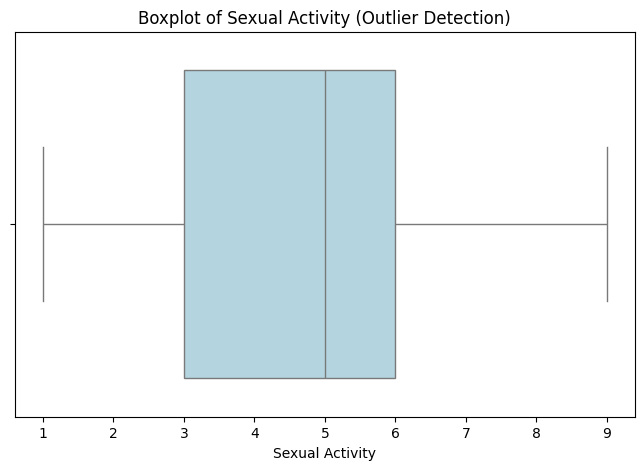

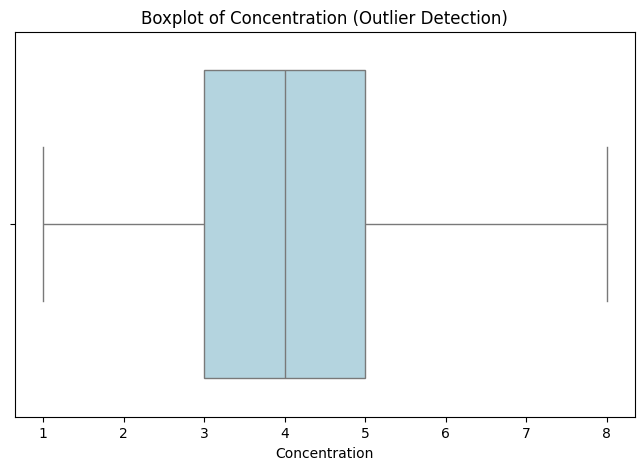

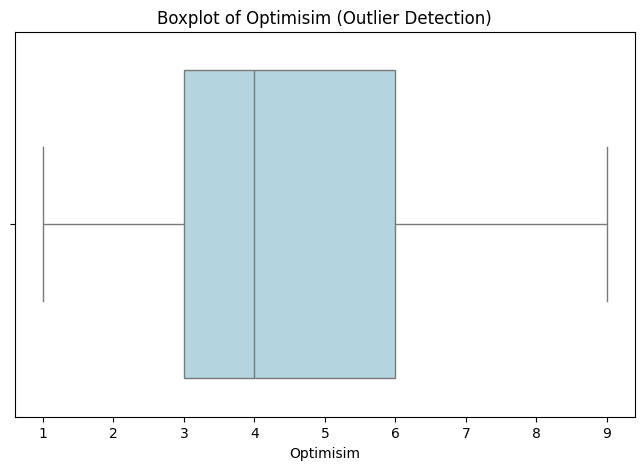

In [5]:
# 2. Outlier Detection using Boxplots
numeric_columns = ['Sexual Activity', 'Concentration', 'Optimisim']
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], color="lightblue")
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.xlabel(col)
    plt.show()

Visualizations: Diagnoses Distribution

<ipython-input-6-772466263252>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Expert Diagnose', data=data, palette="pastel")


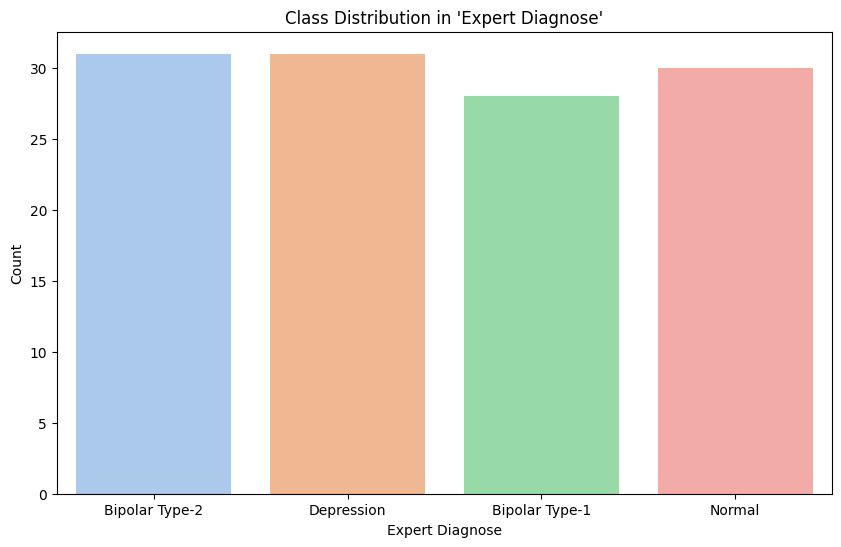

In [6]:
# 3. Check for Class Imbalance in the Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Expert Diagnose', data=data, palette="pastel")
plt.title("Class Distribution in 'Expert Diagnose'")
plt.ylabel("Count")
plt.xlabel("Expert Diagnose")
plt.show()

Featured Distribution

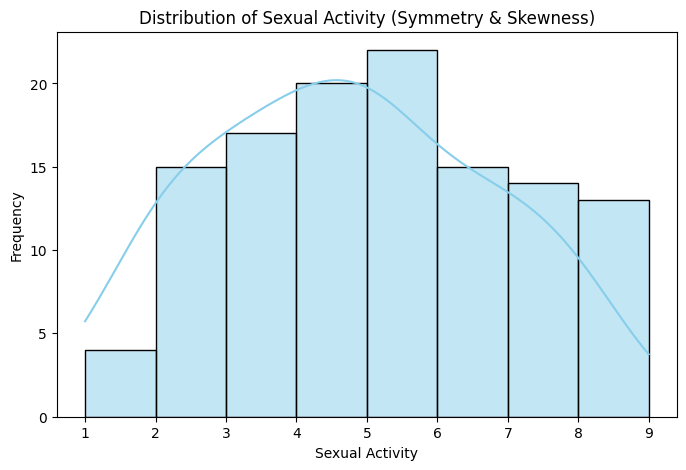

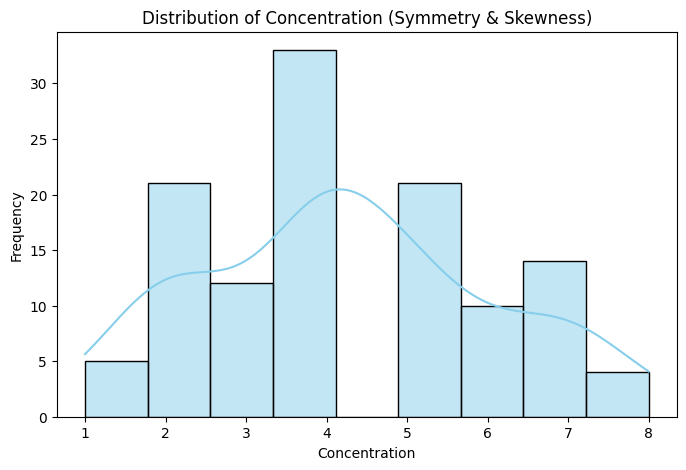

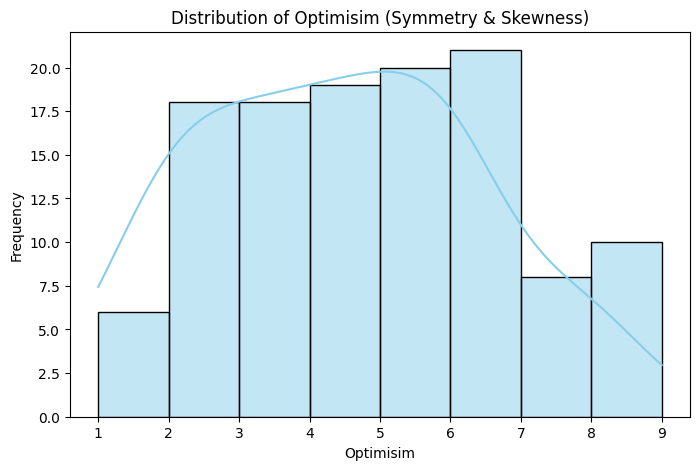

In [7]:
# 4. Analyze Symmetry and Skewness with Histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col} (Symmetry & Skewness)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Correlation heatmap

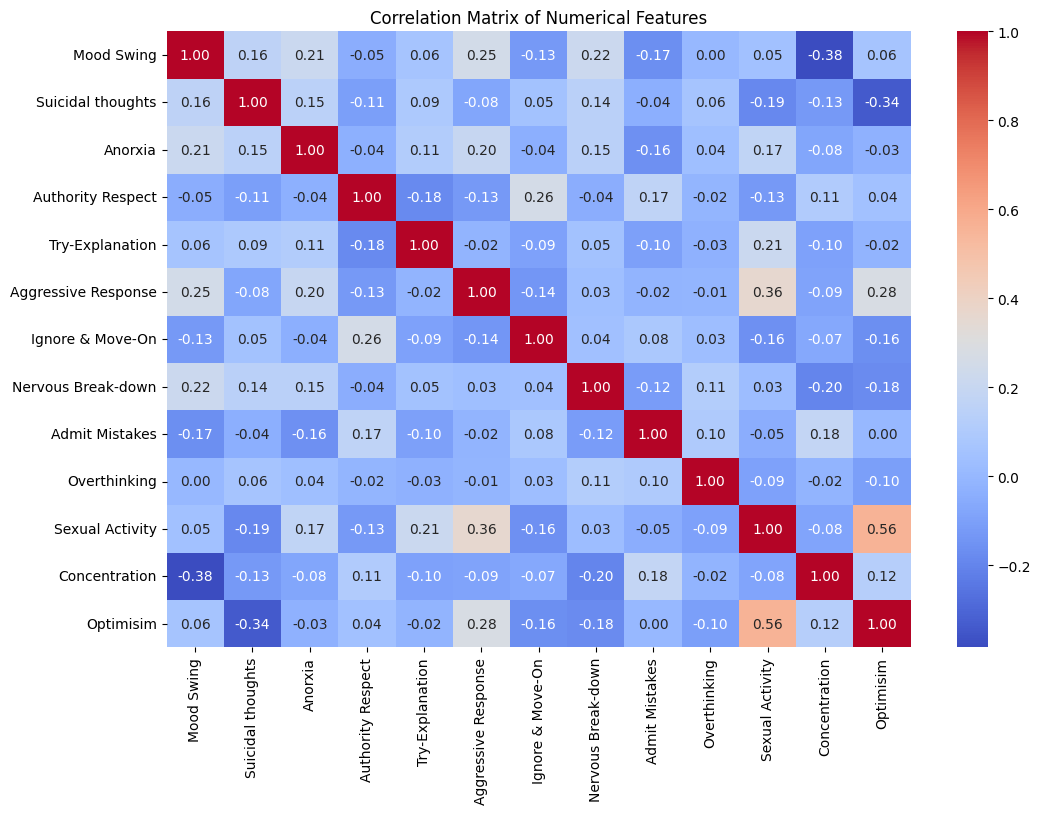

In [8]:
# 5. Correlation Heatmap
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Filter numeric columns
correlation_matrix = numeric_data.corr()  # Compute the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Mood Swing vs suicidal thoughts analysis

<ipython-input-11-5a2e0bcb1efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mood Swing', y='Suicidal thoughts', data=data, palette="viridis")


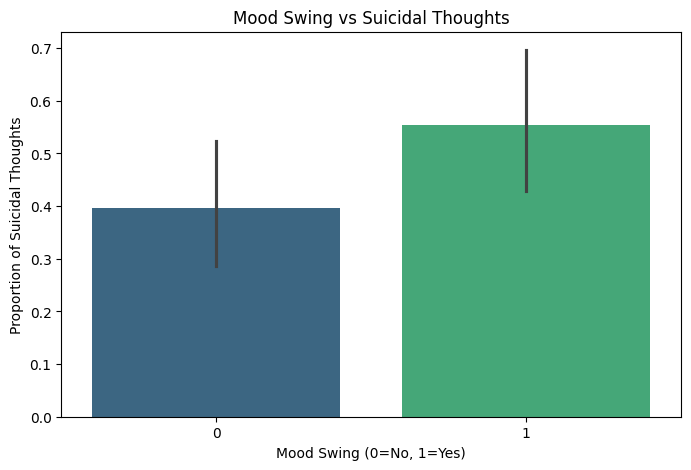

In [11]:
# Mood Swing vs Suicidal Thoughts
plt.figure(figsize=(8, 5))
sns.barplot(x='Mood Swing', y='Suicidal thoughts', data=data, palette="viridis")
plt.title("Mood Swing vs Suicidal Thoughts")
plt.ylabel("Proportion of Suicidal Thoughts")
plt.xlabel("Mood Swing (0=No, 1=Yes)")
plt.show()